In [2]:
import sys
path = '../Ex12_2/'
sys.path.insert(1, path)

from MNIST_CNN import CNN
from keras.optimizers import Adadelta
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

2024-05-18 18:18:06.378477: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-18 18:18:06.384030: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-18 18:18:06.579855: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-18 18:18:07.314871: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-18 18:18:12.300422: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Loading pre-trained model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - acc: 0.9867 - loss: 0.0435

Test loss: 0.03403177857398987
Test accuracy: 0.989300012588501


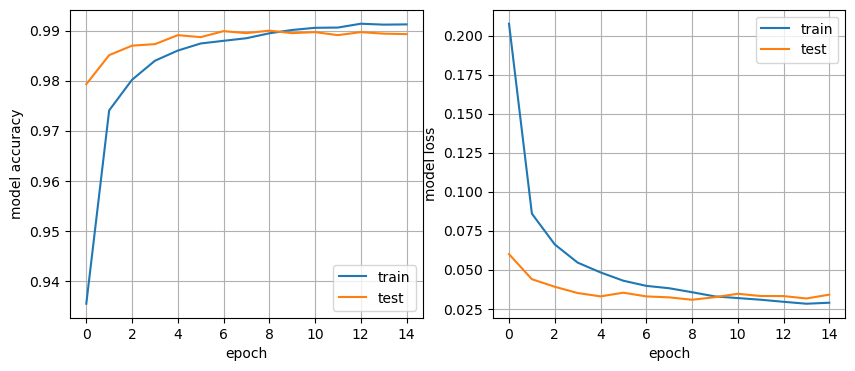

In [3]:
model_CNN = CNN(32, 15, Adadelta(learning_rate = 1.0))
(score, history) = (None, None)

model_filename = path + 'CNN_final.keras'
hist_filename = path + 'hist_final.npy'

if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename))):

    print("Error opening pre-trained CNN")

else:

    model_CNN.load_model(model_filename, hist_filename)
    (score, history) = model_CNN.evaluate_CNN()

# look into training history

plt.figure().set_size_inches(10, 4)

# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

plt.show()

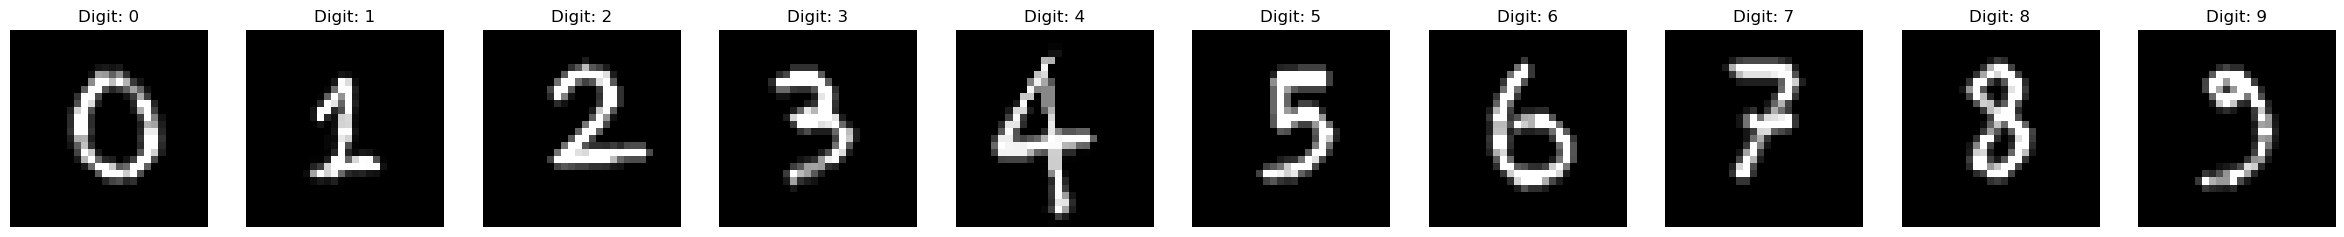

In [22]:
figure, ax = plt.subplots(1, 10)
figure.set_size_inches(30, 15)

hw_digits = []

for idx in range(10):

    digit_filename = "./Pictures/SetA/{}.png".format(idx)
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load()
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255

    ax[idx].imshow(data, cmap='gray')
    ax[idx].set_title("Digit: {}".format(idx)) 
    ax[idx].axis('off') 

    hw_digits.append(data)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


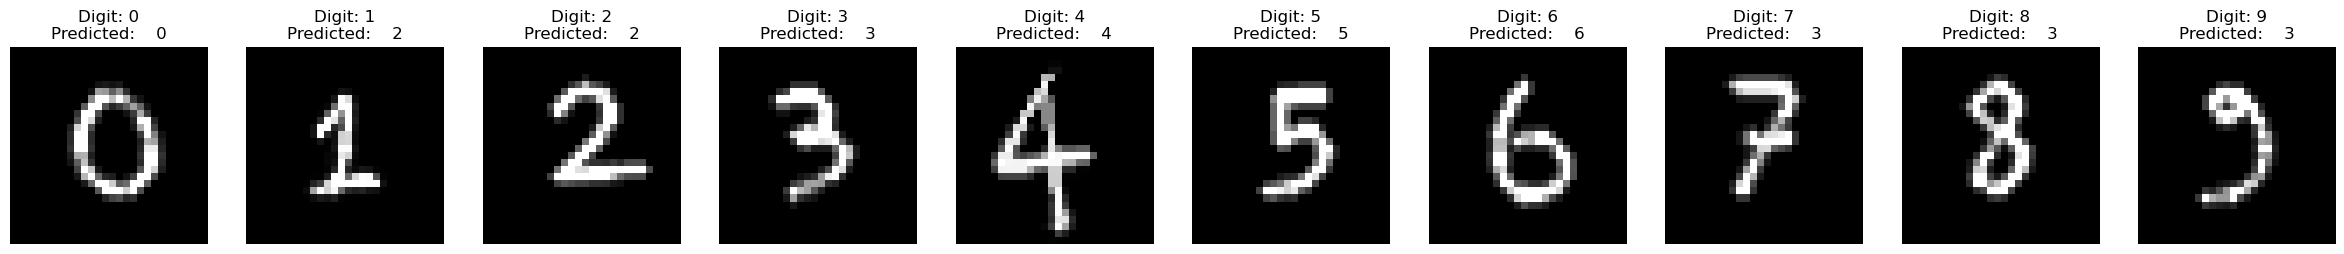

In [23]:
figure, ax = plt.subplots(1, 10)
figure.set_size_inches(30, 15)

for idx, digit in enumerate(hw_digits):

    pred = model_CNN.model.predict(digit.reshape(1, xdim, ydim))
    
    ax[idx].imshow(digit, cmap='gray')    
    ax[idx].set_title("Digit: {}\nPredicted:    {}".format(idx, np.argmax(pred)))
    ax[idx].axis('off') 

plt.show()


A couple of mismatches!!! Is it because of my bad writing or beacuse some digits have a different structure (like the horizontal bar on 7 or the bottom bar on 1)? Let's try by rewriting the wrongly classified digits

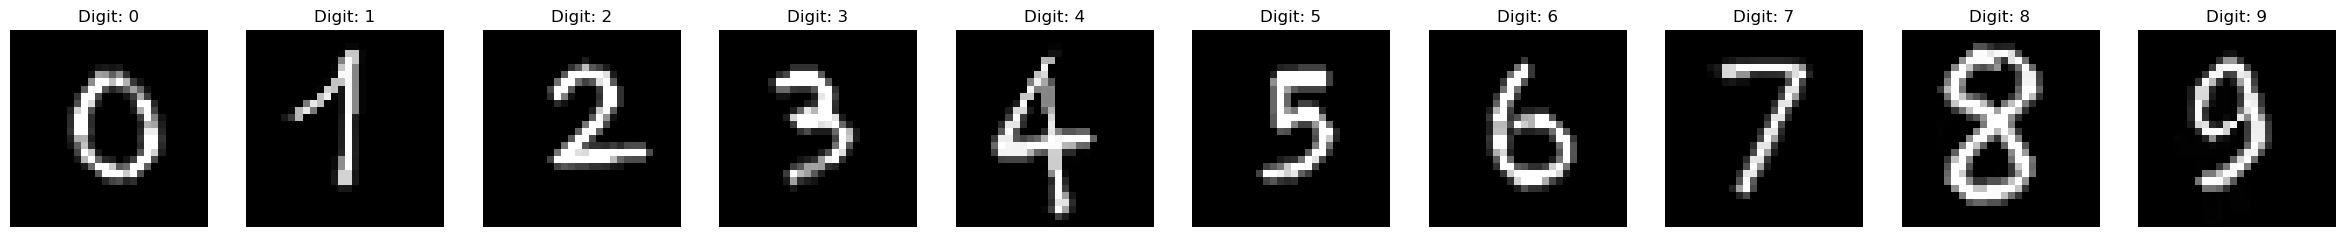

In [27]:
figure, ax = plt.subplots(1, 10)
figure.set_size_inches(30, 15)

hw_digits = []

for idx in range(10):

    digit_filename = "./Pictures/SetB/{}.png".format(idx)
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load()
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255

    ax[idx].imshow(data, cmap='gray')
    ax[idx].set_title("Digit: {}".format(idx)) 
    ax[idx].axis('off') 

    hw_digits.append(data)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


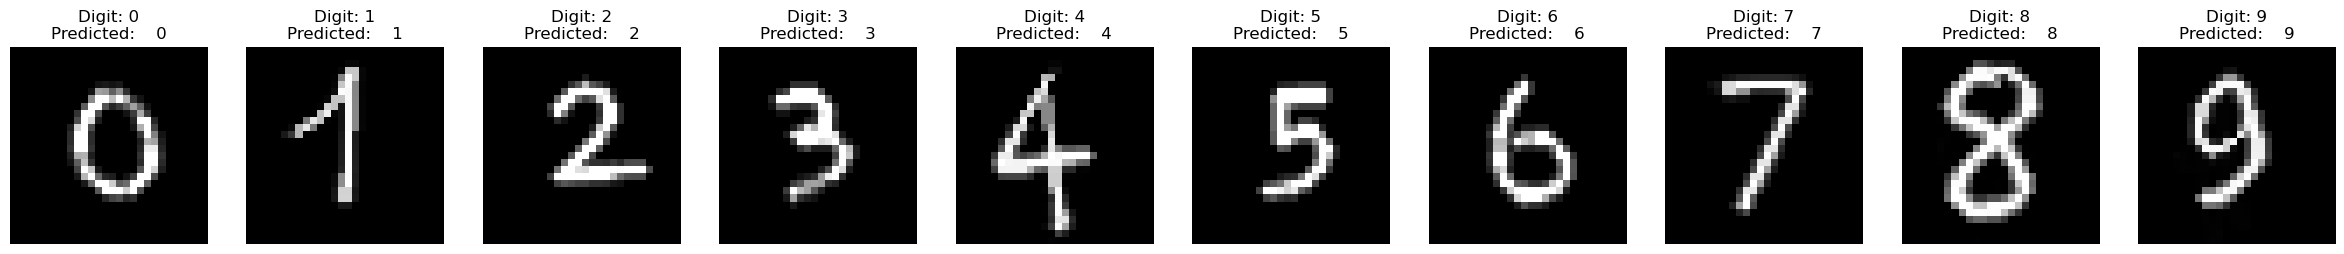

In [28]:
figure, ax = plt.subplots(1, 10)
figure.set_size_inches(30, 15)

for idx, digit in enumerate(hw_digits):

    pred = model_CNN.model.predict(digit.reshape(1, xdim, ydim))
    
    ax[idx].imshow(digit, cmap='gray')    
    ax[idx].set_title("Digit: {}\nPredicted:    {}".format(idx, np.argmax(pred)))
    ax[idx].axis('off') 

plt.show()